In [1]:
using Catlab

# 1. The Graph Schema

### To use the visualization function define in Catlab.jl, we use the pre-built graph schema of "SchGraph" in Catlab.jl. The SchGraph schema is:

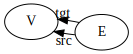

In [2]:
to_graphviz(SchGraph)

# Graphs have the built-in ACSet Graph, from which we will request the terminal object

In [3]:
const 𝒞 = ACSetCategory(CSetCat(Graph()))

ACSetCategory(CSetCat(Graph), Dict{Symbol, Type}(:Cat => ConcreteCategory, :ACSHom => ACSetTransformation, :Hom => FinFunction, :Op => Union{}, :Sym => Symbol, :AttrType => Union{}, :Ob => FinSetInt, :Attr => Union{}, :ACS => ACSet, :Hetero => ConcreteHeteroMorphism…))

# 2. Define Graph instances

In [4]:
g_singleVertex = @acset Graph begin
    V = 1
    E = 0
    src = []
    tgt = []
end
to_graphviz(g_singleVertex)

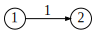

In [5]:
g_connectedPair = @acset Graph begin
    V = 2
    E = 1
    src = [1]
    tgt = [2]
end
to_graphviz(g_connectedPair; node_labels=true, edge_labels=true)


In [6]:
g_reciprocalPair = @acset Graph begin
    V = 2
    E = 2
    src = [1,2]
    tgt = [2,1]
end
to_graphviz(g_reciprocalPair)

# Ok, now take the pushout with a single vertex mapped to the MIDDLE vertex of the two end-to-end arrows (on the one hand) and to the distal end  of the connected pair (on the other)


In [7]:
homomorphisms(g_singleVertex, g_reciprocalPair)

2-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1], FinSet(2)), E = FinFunction(Int64[], FinSet(2))), )
 ACSetTransformation((V = FinFunction([2], FinSet(2)), E = FinFunction(Int64[], FinSet(2))), )

In [8]:
homomorphisms(g_singleVertex, g_connectedPair)

2-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1], FinSet(2)), E = FinFunction(Int64[], FinSet(1))), )
 ACSetTransformation((V = FinFunction([2], FinSet(2)), E = FinFunction(Int64[], FinSet(1))), )

# Ok, now take the pushout with a single vertex mapped to one vertex of the pair with reciprocal (but no self) loops (on the one hand) and to the proximal end of the connected pair (on the other)

![Image of pushout 1](fig/Pushout1.png)

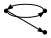

In [9]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_singleVertex, g_reciprocalPair)[1], homomorphisms(g_singleVertex, g_connectedPair)[1])))

### Now map from a connected pair, rather than from simply a vertex

In [10]:
to_graphviz(g_connectedPair)

In [11]:
g_A = @acset Graph begin
    V = 3
    E = 3
    src = [1, 2, 3]
    tgt = [2, 3, 3]
end

E,src,tgt
1,1,2
2,2,3
3,3,3


In [12]:
to_graphviz(g_A)

In [13]:
homomorphisms(g_connectedPair, g_A)

3-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 2], FinSet(3)), E = FinFunction([1], FinSet(3))), )
 ACSetTransformation((V = FinFunction([2, 3], FinSet(3)), E = FinFunction([2], FinSet(3))), )
 ACSetTransformation((V = FinFunction([3, 3], FinSet(3)), E = FinFunction([3], FinSet(3))), )

## Now we define a graph with three vertices, and two edges end-to-end 

In [14]:
g_endToEnd = @acset Graph begin
    V = 3
    E = 2
    src = [1, 2]
    tgt = [2, 3]
end

E,src,tgt
1,1,2
2,2,3


In [15]:
to_graphviz(g_endToEnd)

In [16]:
homomorphisms(g_connectedPair, g_endToEnd)

2-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 2], FinSet(3)), E = FinFunction([1], FinSet(2))), )
 ACSetTransformation((V = FinFunction([2, 3], FinSet(3)), E = FinFunction([2], FinSet(2))), )

# Ok, here we are "gluing graphs around a shared edge" -- we are identifying an edge (g_connectedPair) to hold in common between these graphs!

![Image of pushout 2](fig/Pushout2.png)


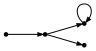

In [17]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_connectedPair, g_A)[1], homomorphisms(g_connectedPair, g_endToEnd)[1])))

In [18]:
apex(pushout[𝒞](homomorphisms(g_connectedPair, g_A)[1], homomorphisms(g_connectedPair, g_endToEnd)[1]))

E,src,tgt
1,1,2
2,2,3
3,3,3
4,2,4


# We now continue on to pullbacks of graphs

## Define some structures

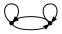

In [19]:
g_reciprocalPairWithSelfLoops = @acset Graph begin
    V = 2
    E = 4
    src = [1,2,1,2]
    tgt = [2,1,1,2]
end
to_graphviz(g_reciprocalPairWithSelfLoops)

In [20]:
g_discretePairWithSelfLoops = @acset Graph begin
    V = 2
    E = 2
    src = [1,2]
    tgt = [1,2]
end
to_graphviz(g_discretePairWithSelfLoops)

## Now set us up to examine multiplication by an arrow with reciprocal loops on both ends, rather than a discrete pair with reciprocal loops.  As a result, we can have directed connections going one direction between the two duplicates of "g_reciprocalPairWithSelfLoops"

In [21]:
g_connectedPairWithSelfLoops = @acset Graph begin
    V = 2
    E = 3
    src = [1,2,1]
    tgt = [1,2,2]
end
to_graphviz(g_connectedPairWithSelfLoops)

## We now consider the pullback of 1) a pair of end-to-end edges 2) a connected pair, fibered around (i.e., taking the pullback over) maps down to g_connectedPairWithSelfLoops, where for 1), the source and target vertices for the first edge map down to the first vertex of g_connectedPairWithSelfLoops, and the other vertex maps to the second such vertex of g_connectedPairWithSelfLoops, while for 2) [the connected edge], the source vertex maps to  first vertex of g_connectedPairWithSelfLoops, and the target vertex maps to the second vertex of g_connectedPairWithSelfLoops.


## Now we define a graph with three vertices, and two edges end-to-end 

In [22]:
g_endToEnd = @acset Graph begin
    V = 3
    E = 2
    src = [1, 2]
    tgt = [2, 3]
end
to_graphviz(g_endToEnd)

In [23]:
homomorphisms(g_endToEnd, g_connectedPairWithSelfLoops)

4-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 1, 1], FinSet(2)), E = FinFunction([1, 1], FinSet(3))), )
 ACSetTransformation((V = FinFunction([1, 1, 2], FinSet(2)), E = FinFunction([1, 3], FinSet(3))), )
 ACSetTransformation((V = FinFunction([1, 2, 2], FinSet(2)), E = FinFunction([3, 2], FinSet(3))), )
 ACSetTransformation((V = FinFunction([2, 2, 2], FinSet(2)), E = FinFunction([2, 2], FinSet(3))), )

In [24]:
homomorphisms(g_connectedPair, g_connectedPairWithSelfLoops)

3-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 1], FinSet(2)), E = FinFunction([1], FinSet(3))), )
 ACSetTransformation((V = FinFunction([1, 2], FinSet(2)), E = FinFunction([3], FinSet(3))), )
 ACSetTransformation((V = FinFunction([2, 2], FinSet(2)), E = FinFunction([2], FinSet(3))), )

# We perform the pullback of the above, and then visualize the result of that pullback

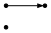

In [25]:
to_graphviz(apex(pullback[𝒞](homomorphisms(g_endToEnd, g_connectedPairWithSelfLoops)[2], homomorphisms(g_connectedPair, g_connectedPairWithSelfLoops)[2])))

In [26]:
g_connectedPairWithProximalSelfLoop = @acset Graph begin
    V = 2
    E = 2
    src = [1,1]
    tgt = [1,2]
end
to_graphviz(g_connectedPairWithProximalSelfLoop)

In [27]:
to_graphviz(apex(pullback[𝒞](homomorphisms(g_connectedPairWithProximalSelfLoop, g_connectedPairWithSelfLoops)[2], homomorphisms(g_endToEnd, g_connectedPairWithSelfLoops)[2])))

# The material below is for students interested in exploring more deeply, or upon request in the mini-course

## 2.1 Graph instance A, note it is a functor G: SchGraph -> FinSet

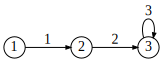

In [28]:
to_graphviz(g_A; node_labels=true, edge_labels=true)

## Recall our graph A

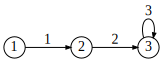

In [29]:
to_graphviz(g_A; node_labels=true, edge_labels=true)

## Now we define a graph with a two vertices, and a single edge betweenst them

In [30]:
g_connectedPair = @acset Graph begin
    V = 2
    E = 1
    src = [1]
    tgt = [2]
end

E,src,tgt
1,1,2


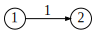

In [31]:
to_graphviz(g_connectedPair; node_labels=true, edge_labels=true)

In [32]:
## Now we define a graph with three vertices, and two edges end-to-end 

In [33]:
g_endToEnd = @acset Graph begin
    V = 3
    E = 2
    src = [1, 2]
    tgt = [2, 3]
end

E,src,tgt
1,1,2
2,2,3


In [34]:
to_graphviz(g_endToEnd)

In [35]:
g_singleVertex = @acset Graph begin
    V = 1
    E = 0
    src = []
    tgt = []
end

Graph {V:1, E:0}

In [36]:
to_graphviz(g_singleVertex)

## g_unit was defined as the terminal graph above

In [37]:
g_unit = apex(terminal[𝒞]())

E,src,tgt
1,1,1


In [38]:
g_unit

E,src,tgt
1,1,1


In [39]:
to_graphviz(g_unit)

In [40]:
g_reciprocalPair = @acset Graph begin
    V = 2
    E = 2
    src = [1,2]
    tgt = [2,1]
end

E,src,tgt
1,1,2
2,2,1


In [41]:
to_graphviz(g_reciprocalPair)

In [42]:
to_graphviz(g_singleVertex)

In [43]:
homomorphisms(g_singleVertex, g_reciprocalPair)

2-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1], FinSet(2)), E = FinFunction(Int64[], FinSet(2))), )
 ACSetTransformation((V = FinFunction([2], FinSet(2)), E = FinFunction(Int64[], FinSet(2))), )

In [44]:
to_graphviz(g_connectedPair)

In [45]:
homomorphisms(g_singleVertex, g_connectedPair)

2-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1], FinSet(2)), E = FinFunction(Int64[], FinSet(1))), )
 ACSetTransformation((V = FinFunction([2], FinSet(2)), E = FinFunction(Int64[], FinSet(1))), )

# Ok, now take the pushout with a single vertex mapped to one vertex of the pair with reciprocal (but no self) loops (on the one hand) and to the proximal end of the connected pair (on the other)

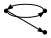

In [46]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_singleVertex, g_reciprocalPair)[1], homomorphisms(g_singleVertex, g_connectedPair)[1])))

In [47]:
# Ok, now take the pushout with a single vertex mapped to the MIDDLE vertex of the two end-to-end arrows (on the one hand) and to the distal end  of the connected pair (on the other)

In [48]:
homomorphisms(g_singleVertex, g_connectedPair)

2-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1], FinSet(2)), E = FinFunction(Int64[], FinSet(1))), )
 ACSetTransformation((V = FinFunction([2], FinSet(2)), E = FinFunction(Int64[], FinSet(1))), )

In [49]:
homomorphisms(g_singleVertex, g_endToEnd)

3-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1], FinSet(3)), E = FinFunction(Int64[], FinSet(2))), )
 ACSetTransformation((V = FinFunction([2], FinSet(3)), E = FinFunction(Int64[], FinSet(2))), )
 ACSetTransformation((V = FinFunction([3], FinSet(3)), E = FinFunction(Int64[], FinSet(2))), )

In [50]:
# We now take the pushout (per the above), and to then visualize the result of that pushout, as part of Problem 1 of the take-home exercise.

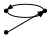

In [51]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_singleVertex, g_reciprocalPair)[2], homomorphisms(g_singleVertex, g_connectedPair)[2])))

## As a more elaborated example, we now take pushouts of g_A and g_endtoEnd at different points mapped (via homomorphism) from a vertex

In [52]:
homomorphisms(g_singleVertex, g_A)

3-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1], FinSet(3)), E = FinFunction(Int64[], FinSet(3))), )
 ACSetTransformation((V = FinFunction([2], FinSet(3)), E = FinFunction(Int64[], FinSet(3))), )
 ACSetTransformation((V = FinFunction([3], FinSet(3)), E = FinFunction(Int64[], FinSet(3))), )

In [53]:
homomorphisms(g_singleVertex, g_endToEnd)

3-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1], FinSet(3)), E = FinFunction(Int64[], FinSet(2))), )
 ACSetTransformation((V = FinFunction([2], FinSet(3)), E = FinFunction(Int64[], FinSet(2))), )
 ACSetTransformation((V = FinFunction([3], FinSet(3)), E = FinFunction(Int64[], FinSet(2))), )

### Reminder of g_A and g_endToEnd

In [54]:
to_graphviz(g_A)

In [55]:
to_graphviz(g_endToEnd)

### Join at the start of each of the graphs

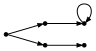

In [56]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_singleVertex, g_A)[1], homomorphisms(g_singleVertex, g_endToEnd)[1])))

### Join at the start of g_A, but the mid-point of the end-to-end graph

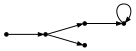

In [57]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_singleVertex, g_A)[1], homomorphisms(g_singleVertex, g_endToEnd)[2])))

### Join at the start of g_A, but the endpoint of the end-to-end graph

In [58]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_singleVertex, g_A)[1], homomorphisms(g_singleVertex, g_endToEnd)[3])))

### Join at the mid-point of g_A, but the start of the end-to-end graph

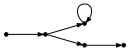

In [59]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_singleVertex, g_A)[2], homomorphisms(g_singleVertex, g_endToEnd)[1])))

### Join at the mid-point of g_A, and the mid-point of the end-to-end graph

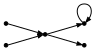

In [60]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_singleVertex, g_A)[2], homomorphisms(g_singleVertex, g_endToEnd)[2])))

### Join at the mid-point of g_A, and the endpoint of the end-to-end graph

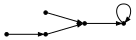

In [61]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_singleVertex, g_A)[2], homomorphisms(g_singleVertex, g_endToEnd)[3])))

### Join at the endpoint of g_A, and the start of the end-to-end graph

In [62]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_singleVertex, g_A)[3], homomorphisms(g_singleVertex, g_endToEnd)[1])))

### Join at the endpoint of g_A, and the mid-point of the end-to-end graph

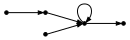

In [63]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_singleVertex, g_A)[3], homomorphisms(g_singleVertex, g_endToEnd)[2])))

### Join at the endpoint of g_A, and the end-point of the end-to-end graph

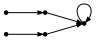

In [64]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_singleVertex, g_A)[3], homomorphisms(g_singleVertex, g_endToEnd)[3])))

### Now map from a connected pair, rather than from simply a vertex

In [65]:
to_graphviz(g_connectedPair)

In [66]:
to_graphviz(g_A)

In [67]:
homomorphisms(g_connectedPair, g_A)

3-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 2], FinSet(3)), E = FinFunction([1], FinSet(3))), )
 ACSetTransformation((V = FinFunction([2, 3], FinSet(3)), E = FinFunction([2], FinSet(3))), )
 ACSetTransformation((V = FinFunction([3, 3], FinSet(3)), E = FinFunction([3], FinSet(3))), )

In [68]:
to_graphviz(g_endToEnd)

In [69]:
homomorphisms(g_connectedPair, g_endToEnd)

2-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 2], FinSet(3)), E = FinFunction([1], FinSet(2))), )
 ACSetTransformation((V = FinFunction([2, 3], FinSet(3)), E = FinFunction([2], FinSet(2))), )

# Ok, here we are "gluing graphs around a shared edge" -- we are identifying an edge (g_connectedPair) to hold in common between these graphs!

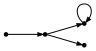

In [70]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_connectedPair, g_A)[1], homomorphisms(g_connectedPair, g_endToEnd)[1])))

In [71]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_connectedPair, g_A)[1], homomorphisms(g_connectedPair, g_endToEnd)[2])))

In [72]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_connectedPair, g_A)[2], homomorphisms(g_connectedPair, g_endToEnd)[1])))

In [73]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_connectedPair, g_A)[3], homomorphisms(g_connectedPair, g_endToEnd)[1])))

In [74]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_connectedPair, g_A)[1], homomorphisms(g_connectedPair, g_endToEnd)[2])))

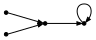

In [75]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_connectedPair, g_A)[2], homomorphisms(g_connectedPair, g_endToEnd)[2])))

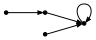

In [76]:
to_graphviz(apex(pushout[𝒞](homomorphisms(g_connectedPair, g_A)[3], homomorphisms(g_connectedPair, g_endToEnd)[2])))

# We now continue on to pullbacks of graphs

## define some structures

In [77]:
g_reciprocalPairWithSelfLoops = @acset Graph begin
    V = 2
    E = 4
    src = [1,2,1,2]
    tgt = [2,1,1,2]
end

E,src,tgt
1,1,2
2,2,1
3,1,1
4,2,2


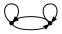

In [78]:
to_graphviz(g_reciprocalPairWithSelfLoops)

In [79]:
g_discretePairWithSelfLoops = @acset Graph begin
    V = 2
    E = 2
    src = [1,2]
    tgt = [1,2]
end

E,src,tgt
1,1,1
2,2,2


In [80]:
to_graphviz(g_discretePairWithSelfLoops)

## Now with multiplication by an arrow with reciprocal loops on both ends, rather than a discrete pair with reciprocal loops.  As a result, we can have directed connections going one direction between the two duplicates of "g_reciprocalPairWithSelfLoops"

In [81]:
g_connectedPairWithSelfLoops = @acset Graph begin
    V = 2
    E = 3
    src = [1,2,1]
    tgt = [1,2,2]
end

E,src,tgt
1,1,1
2,2,2
3,1,2


## Now with multiplication by an arrow with a reciprocal loop on the proximal end only, rather than a discrete pair with reciprocal loops.  The result is that no connections are allowed within the distal side.

In [82]:
g_connectedPairWithProximalSelfLoop = @acset Graph begin
    V = 2
    E = 2
    src = [1,1]
    tgt = [1,2]
end

E,src,tgt
1,1,1
2,1,2


## Now with multiplication by an arrow with a reciprocal loop on the distal end only.  The result is that no connections are allowed within the proximal side.

In [83]:
g_connectedPairWithDistalSelfLoop = @acset Graph begin
    V = 2
    E = 2
    src = [1,2]
    tgt = [2,2]
end

E,src,tgt
1,1,2
2,2,2


In [84]:
g_connectedPairWithSelfLoops = @acset Graph begin
    V = 2
    E = 3
    src = [1,2,1]
    tgt = [1,2,2]
end

E,src,tgt
1,1,1
2,2,2
3,1,2


## Having defined the structures above, we now continue on to explore pullbacks of graphs

In [85]:
to_graphviz(g_connectedPairWithSelfLoops)

## we consider the pullback of 1) a pair of end-to-end edges 2) a connected pair, fibered around (i.e., taking the pullback over) maps down to g_connectedPairWithSelfLoops, where for 1), the source and target vertices for the first edge map down to the first vertex of g_connectedPairWithSelfLoops, and the other vertex maps to the second such vertex of g_connectedPairWithSelfLoops, while for 2) [the connected edge], the source vertex maps to  first vertex of g_connectedPairWithSelfLoops, and the target vertex maps to the second vertex of g_connectedPairWithSelfLoops.

In [86]:
to_graphviz(g_endToEnd)

In [87]:
homomorphisms(g_endToEnd, g_connectedPairWithSelfLoops)

4-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 1, 1], FinSet(2)), E = FinFunction([1, 1], FinSet(3))), )
 ACSetTransformation((V = FinFunction([1, 1, 2], FinSet(2)), E = FinFunction([1, 3], FinSet(3))), )
 ACSetTransformation((V = FinFunction([1, 2, 2], FinSet(2)), E = FinFunction([3, 2], FinSet(3))), )
 ACSetTransformation((V = FinFunction([2, 2, 2], FinSet(2)), E = FinFunction([2, 2], FinSet(3))), )

In [88]:
homomorphisms(g_connectedPair, g_connectedPairWithSelfLoops)

3-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 1], FinSet(2)), E = FinFunction([1], FinSet(3))), )
 ACSetTransformation((V = FinFunction([1, 2], FinSet(2)), E = FinFunction([3], FinSet(3))), )
 ACSetTransformation((V = FinFunction([2, 2], FinSet(2)), E = FinFunction([2], FinSet(3))), )

In [89]:
# We perform the pullback of the above, and then visualize the result of that pullback

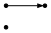

In [90]:
to_graphviz(apex(pullback[𝒞](homomorphisms(g_endToEnd, g_connectedPairWithSelfLoops)[2], homomorphisms(g_connectedPair, g_connectedPairWithSelfLoops)[2])))

# A related example, but with added flexibility afforded by a self-loop on one of the graphs

In [91]:
g_connectedPairWithProximalSelfLoop = @acset Graph begin
    V = 2
    E = 2
    src = [1,1]
    tgt = [1,2]
end

E,src,tgt
1,1,1
2,1,2


In [92]:
g_endToEndWithProximalLoop = @acset Graph begin
    V = 3
    E = 2
    src = [1, 2]
    tgt = [2, 3]
end

E,src,tgt
1,1,2
2,2,3


In [93]:
homomorphisms(g_connectedPairWithProximalSelfLoop, g_connectedPairWithSelfLoops)

3-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 1], FinSet(2)), E = FinFunction([1, 1], FinSet(3))), )
 ACSetTransformation((V = FinFunction([1, 2], FinSet(2)), E = FinFunction([1, 3], FinSet(3))), )
 ACSetTransformation((V = FinFunction([2, 2], FinSet(2)), E = FinFunction([2, 2], FinSet(3))), )

In [94]:
homomorphisms(g_endToEnd, g_connectedPairWithSelfLoops)

4-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 1, 1], FinSet(2)), E = FinFunction([1, 1], FinSet(3))), )
 ACSetTransformation((V = FinFunction([1, 1, 2], FinSet(2)), E = FinFunction([1, 3], FinSet(3))), )
 ACSetTransformation((V = FinFunction([1, 2, 2], FinSet(2)), E = FinFunction([3, 2], FinSet(3))), )
 ACSetTransformation((V = FinFunction([2, 2, 2], FinSet(2)), E = FinFunction([2, 2], FinSet(3))), )

In [95]:
to_graphviz(apex(pullback[𝒞](homomorphisms(g_connectedPairWithProximalSelfLoop, g_connectedPairWithSelfLoops)[2], homomorphisms(g_endToEnd, g_connectedPairWithSelfLoops)[2])))

# Now we have another example

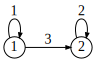

In [96]:
to_graphviz(g_connectedPairWithSelfLoops; node_labels=true, edge_labels=true)

In [97]:
g_endToEndWithReciprocalDistalConnections = @acset Graph begin
    V = 3
    E = 3
    src = [1, 2, 3]
    tgt = [2, 3, 2]
end

E,src,tgt
1,1,2
2,2,3
3,3,2


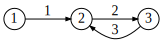

In [98]:
to_graphviz(g_endToEndWithReciprocalDistalConnections; node_labels=true, edge_labels=true)

In [99]:
g_B = @acset Graph begin
    V = 4
    E = 4
    src = [1, 2, 3, 4]
    tgt = [3, 1, 2, 3]
end

E,src,tgt
1,1,3
2,2,1
3,3,2
4,4,3


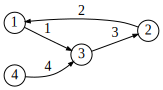

In [100]:
to_graphviz(g_B; node_labels=true, edge_labels=true)

In [101]:
g_endToEndWithReciprocalDistalConnections_to_type=homomorphisms(g_endToEndWithReciprocalDistalConnections, g_connectedPairWithSelfLoops)[2]

ACSetTransformation((V = FinFunction([1, 2, 2], FinSet(2)), E = FinFunction([3, 2, 2], FinSet(3))), )

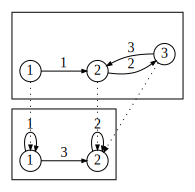

In [102]:
to_graphviz(g_endToEndWithReciprocalDistalConnections_to_type; node_labels=true, edge_labels=true, draw_codom=true)

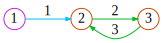

In [103]:
to_graphviz(g_endToEndWithReciprocalDistalConnections_to_type; node_labels=true, edge_labels=true, draw_codom=false)

In [104]:
g_B_to_type=homomorphisms(g_B, g_connectedPairWithSelfLoops)[2]

ACSetTransformation((V = FinFunction([2, 2, 2, 1], FinSet(2)), E = FinFunction([2, 2, 2, 3], FinSet(3))), )

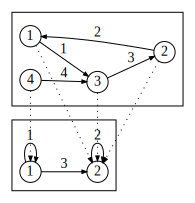

In [105]:
to_graphviz(g_B_to_type; node_labels=true, edge_labels=true, draw_codom=true)

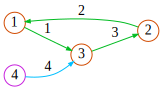

In [106]:
to_graphviz(g_B_to_type; node_labels=true, edge_labels=true, draw_codom=false)

In [107]:
pb_gA_gB_apex = apex(pullback[𝒞](g_endToEndWithReciprocalDistalConnections_to_type, g_B_to_type))

E,src,tgt
1,1,6
2,2,5
3,3,2
4,4,1
5,5,4
6,6,3
7,7,5


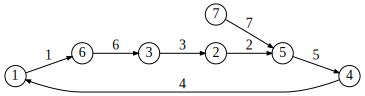

In [108]:
to_graphviz(pb_gA_gB_apex; node_labels=true, edge_labels=true)

# Now we turn to Discrete Dynamical Systems

In [109]:
 #2. define the schema of DDS
@present SchDDS(FreeSchema) begin
    State::Ob
    next::Hom(State,State)
    end;

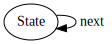

In [110]:
to_graphviz(SchDDS)

In [111]:
@acset_type DDSInstance(SchDDS, index=[:next])

DDSInstance

In [112]:
const S=ACSetCategory(CSetCat(DDSInstance()))
#const 𝒞 = ACSetCategory(CSetCat(Graph()))

ACSetCategory(CSetCat(DDSInstance), Dict{Symbol, Type}(:Cat => ConcreteCategory, :ACSHom => ACSetTransformation, :Hom => FinFunction, :Op => Union{}, :Sym => Symbol, :AttrType => Union{}, :Ob => FinSetInt, :Attr => Union{}, :ACS => ACSet, :Hetero => ConcreteHeteroMorphism…))

In [113]:
dds_reciprocalPair = @acset DDSInstance begin
    State = 2
    next = [2, 1]
end

State,next
1,2
2,1


In [114]:
# define a discrete dynamical system cycling amongst 4 states.
dds_cycle3 = @acset DDSInstance begin
    State = 3
    next = [2, 3, 1]
end

State,next
1,2
2,3
3,1


In [115]:
# define the same graph
dds_cycle2 = @acset DDSInstance begin
    State = 2
    next = [2, 1]
end

State,next
1,2
2,1


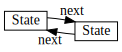

In [116]:
to_graphviz(elements(dds_cycle2))

In [117]:
dds_twoStateThenTrapped = @acset DDSInstance begin
    State = 3
    next = [2, 3, 3]
end

State,next
1,2
2,3
3,3


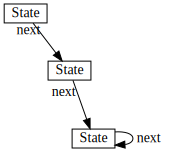

In [118]:
to_graphviz(elements(dds_twoStateThenTrapped))

In [119]:
dds_threeStateThenTrapped = @acset DDSInstance begin
    State = 4
    next = [2, 3, 4, 4]
end

State,next
1,2
2,3
3,4
4,4


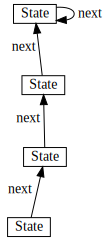

In [120]:
to_graphviz(elements(dds_threeStateThenTrapped))

In [121]:
dds_singleState = terminal[S]()

ACSetLimit(Multispan{DDSInstance, ACSetTransformation, Any, Vector{ACSetTransformation}, Vector{Any}}(DDSInstance:
  State = 1:1
  next : State → State = [1], ACSetTransformation[], Any[]), (State = TerminalLimit{FinSetInt, FinFunction}(FinSet(1)),), FreeDiagram(EmptyDiagram{ACSet, StaticArraysCore.SVector{0, ACSet}}(ACSet[]), Dict{Symbol, Type}(:Ob => ACSet, :FSet => FinSet, :Hom => Union{}, :V => Int64, :E => Int64)))

In [122]:
to_graphviz(elements(apex(dds_singleState)))

In [123]:
typeof(ob(dds_singleState))
typeof(dds_twoStateThenTrapped)

DDSInstance

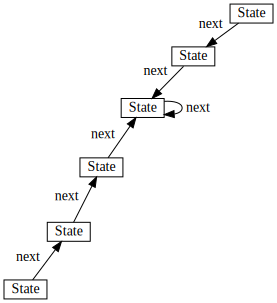

In [124]:
to_graphviz(elements(apex(pushout[S](homomorphisms(ob(dds_singleState), dds_threeStateThenTrapped)[1], homomorphisms(ob(dds_singleState), dds_twoStateThenTrapped)[1]))))

In [125]:
#to_graphviz(elements(apex(pushout[S](homomorphism(dds_singleState, dds_twoStateThenTrapped)[1], homomorphism(dds_singleState, dds_threeStateThenTrapped)[1]))))

In [126]:
homomorphism(ob(dds_singleState), dds_twoStateThenTrapped)

ACSetTransformation((State = FinFunction([3], FinSet(3)),), )